# The Spark Foundation ( Data Science & Business Analytics )
### As a Business Analyst I have to find out Strong and Weak States in making profits as well as the Categories.
#### Author : Vinay Namani

In [66]:
# Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Loading the Dataset
df = pd.read_csv("/Users/Vinay Naman/Downloads/SampleSuperstore.csv")

In [30]:
# Checking the head of the Dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [31]:
# Checking the Basic info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [32]:
# Checking the Description of the Data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [33]:
# Checking number of unique values in the columns
unique_values = []
for col in cat_cols:
    count = df[col].nunique()
    unique_values.append(count)

In [34]:
unique_value_df = pd.DataFrame({"columns":cat_cols,"Unique_values":unique_values})

In [35]:
unique_value_df

,columns,Unique_values
0,Ship Mode,4
1,Segment,3
2,Country,1
3,City,531
4,State,49
5,Region,4
6,Category,3
7,Sub-Category,17


In [36]:
shipmode_profit = df.groupby("Ship Mode")['Profit'].agg('sum').values

In [37]:
shipmode_labels = df.groupby("Ship Mode")['Profit'].agg('sum').index

In [38]:
colors = plt.cm.Wistia(np.linspace(0,1,5))

In [39]:
explode = [0.0,0.0,0.0,0.1]

Text(0.5, 1.0, 'Profit as per the Ship Mode')

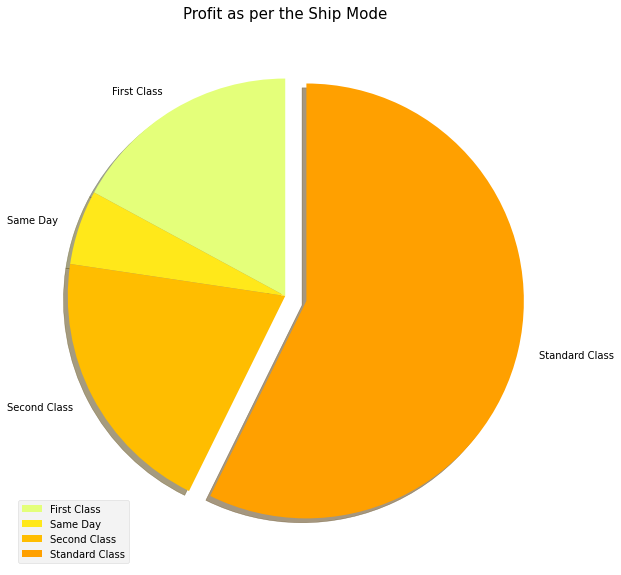

In [40]:
# Checking which Shipmode making more profits
plt.figure(figsize=(10,10))
plt.pie(shipmode_profit,explode=explode,labels=shipmode_labels,colors=colors,shadow=True,startangle=90)
plt.legend()
plt.title("Profit as per the Ship Mode",fontsize=15)

In [41]:
segment_profit = df.groupby("Segment")['Profit'].agg('sum').values

In [42]:
segment_labels = df.groupby("Segment")['Profit'].agg('sum').index

Text(0.5, 1.0, 'Profit as per the Segment')

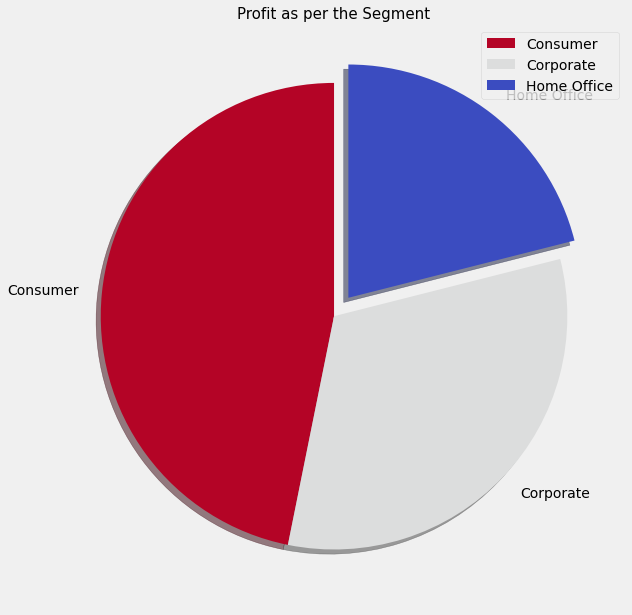

In [65]:
# Checking which segment is making more profits
colors = plt.cm.coolwarm_r(np.linspace(0,1,3))
explode = [0.0,0.0,0.1]
plt.figure(figsize=(10,10))
plt.pie(segment_profit,explode=explode,labels=segment_labels,colors=colors,shadow=True,startangle=90)
plt.legend()
plt.title("Profit as per the Segment",fontsize=15)

In [44]:
statewise_profit = df.groupby("State")['Profit'].agg("sum").sort_values(ascending=False).values

In [45]:
state_list = df.groupby("State")['Profit'].agg("sum").sort_values(ascending=False).index

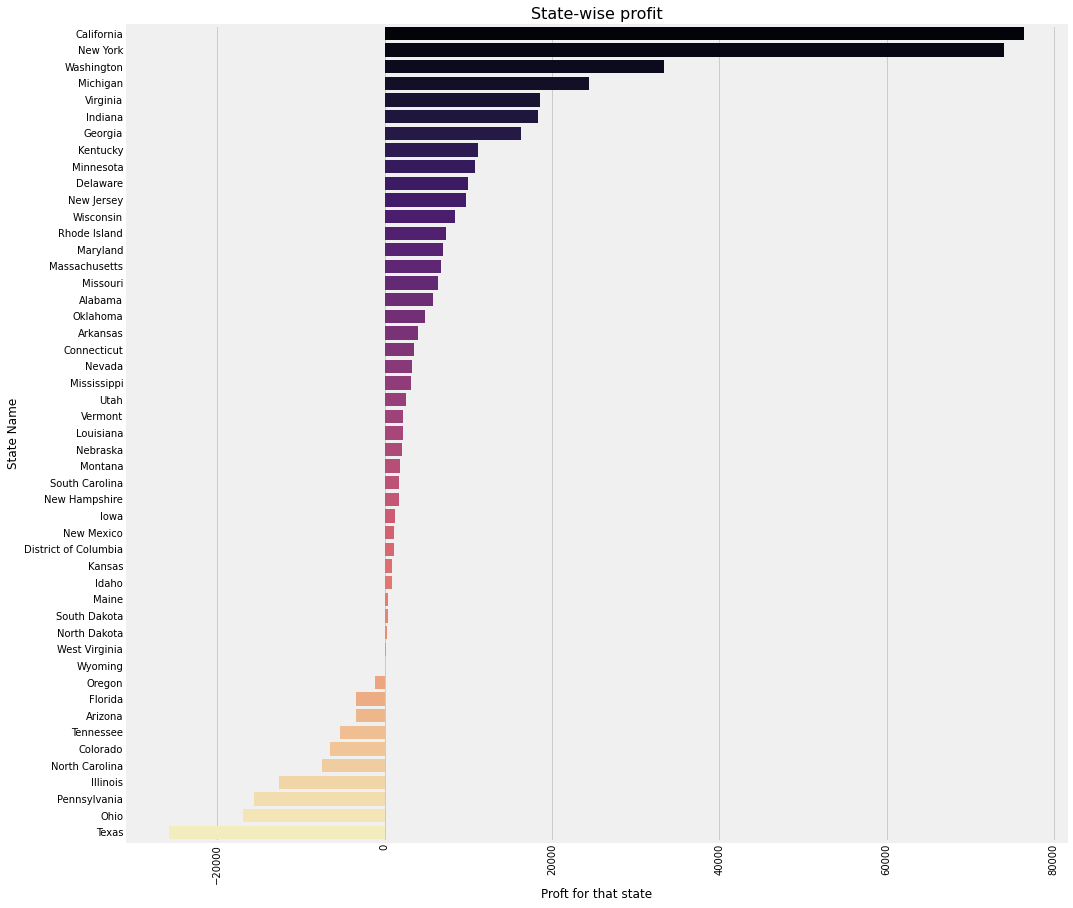

In [46]:
# Checking which State is making more Profit
plt.rcParams['figure.figsize'] = (15,15)
sns.barplot(statewise_profit,state_list, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Proft for that state', fontsize=12)
plt.ylabel('State Name', fontsize=12)
plt.title("State-wise profit", fontsize=16)
plt.show()

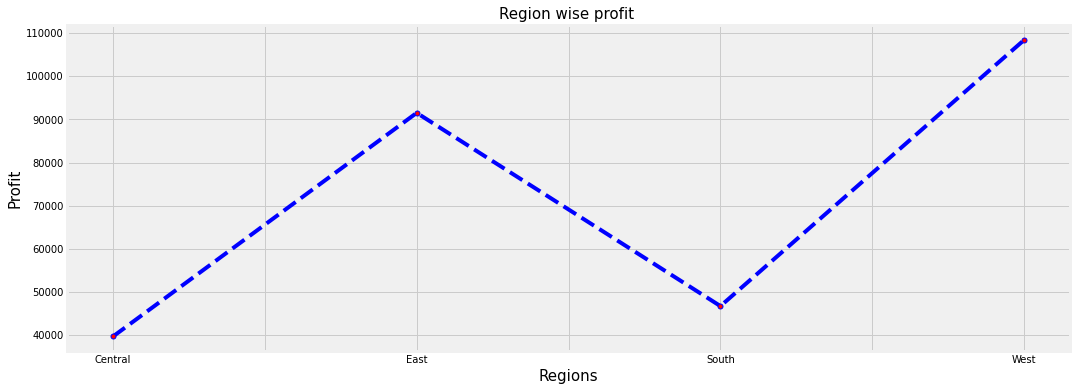

In [47]:
# checking which region is making more profit
plt.figure(figsize=(16,6))
df.groupby('Region')['Profit'].agg("sum").plot(color='blue',linestyle="--",marker="o",markersize=5,markerfacecolor='red')
plt.title("Region wise profit ",fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

In [48]:
# Checking the State which is making maximum Profit
df[df['Profit'] == max(df['Profit'])][['State','Profit']]

,State,Profit
6826,Indiana,8399.976


In [49]:
# Checking the state which is making huge loss to the store
df[df['Profit'] == min(df['Profit'])][["State","Profit"]]

,State,Profit
7772,Ohio,-6599.978


<AxesSubplot:xlabel='Region'>

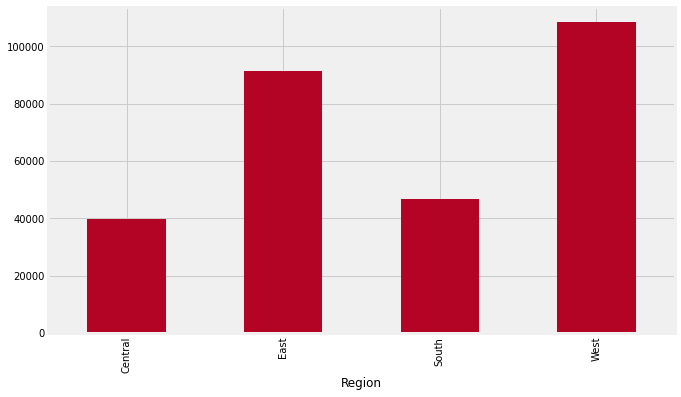

In [50]:
# Regions making Acuumulative Profit
plt.figure(figsize=(10,6))
df.groupby('Region')['Profit'].agg("sum").plot(kind = 'bar',cmap="coolwarm_r")

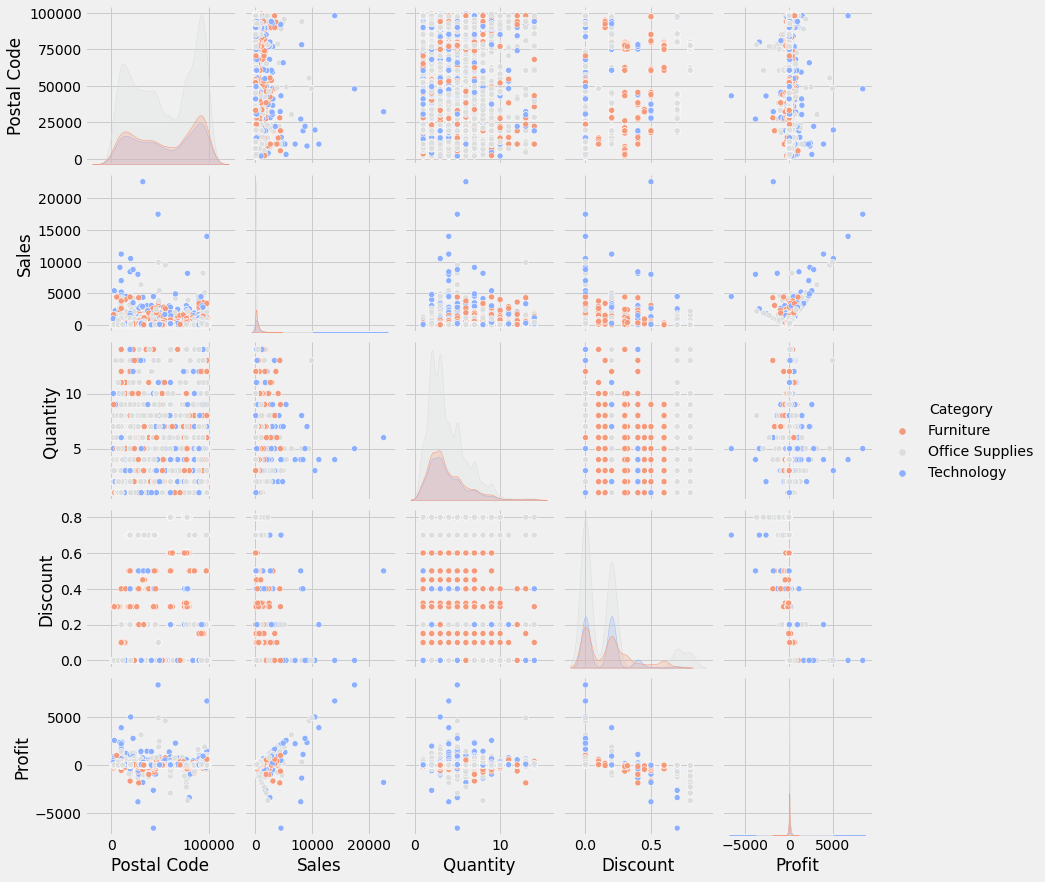

In [52]:
# Checking the Correlation for the Features
sns.pairplot(df,hue='Category',palette="coolwarm_r")

In [53]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:xlabel='Sub-Category'>

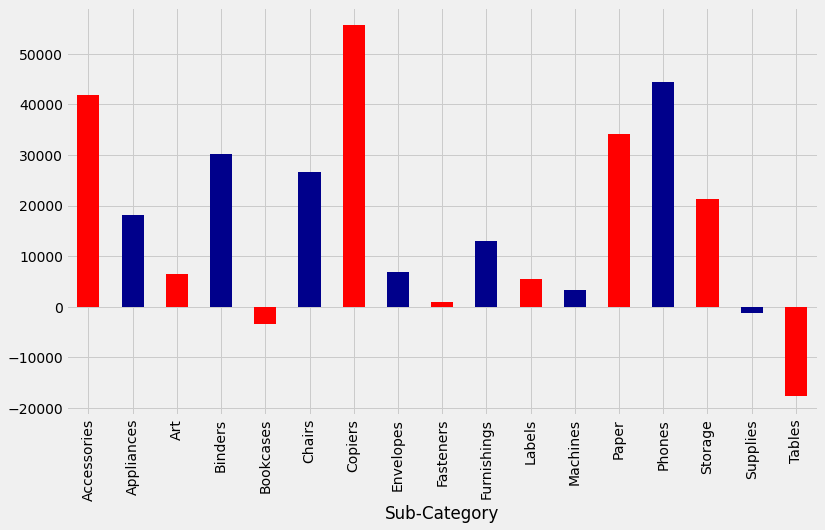

In [61]:
df.groupby('Sub-Category')['Profit'].agg('sum').plot.bar(color=['red','darkblue'],figsize=(12,7))

<AxesSubplot:xlabel='Category'>

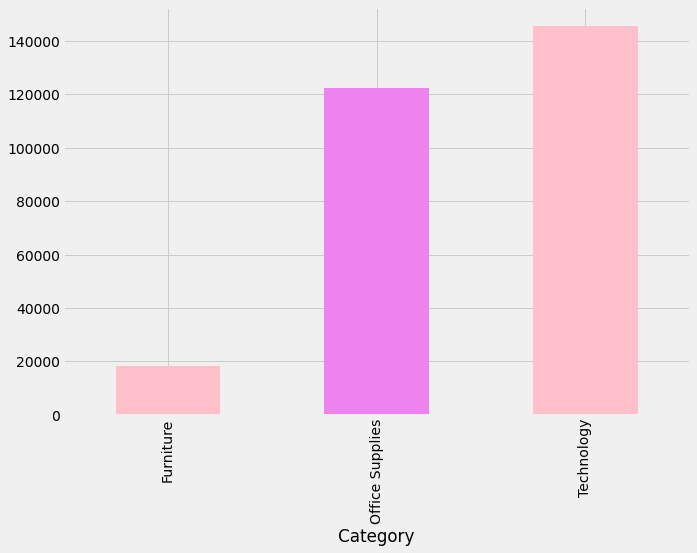

In [64]:
df.groupby('Category')['Profit'].agg('sum').plot.bar(color=['pink','violet'],figsize=(10,7))

# Conclusion 
# West Region is being the top region
## Overall Standard Class making more profit than others
## Consumer Segment was doing will in making profits 
### California , NewYork and Washington states are making highest number of profits
### Texas and Ohio are the lowest states in making profits
### Indiana State is being the Top state with Maximum Profit 
### Ohio state is making loss for that Store
#### Accessories, Phone and Copiers are the Categories making good amount of profits
#### Tables are falling into Loss